In [1]:
import ROOT
import os
from my_utils import *
import fst

import phidrive
import micos_eco

data_dir = make_data_dir()



from ROOT import gInterpreter, gSystem
gInterpreter.ProcessLine('#include "/workdir/my_event.h"')




Welcome to JupyROOT 6.14/04


0

In [2]:
##################################################
##   clear data dir, copy root file             ##
##################################################

#fst.take_data(events=500)
#fst.take_data(time=10)

## new data or existing data?

fresh = 0

if fresh:
  clear_data_dir()
  os.system("cp /workdir/joint_tree.root {:s}/".format(data_dir))

In [3]:
##################################################
##               slurp root file                ##
##################################################

c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

f = ROOT.TFile("{:s}/joint_tree.root".format(data_dir))
tree = f.Get("joint_tree")

#c.Draw()

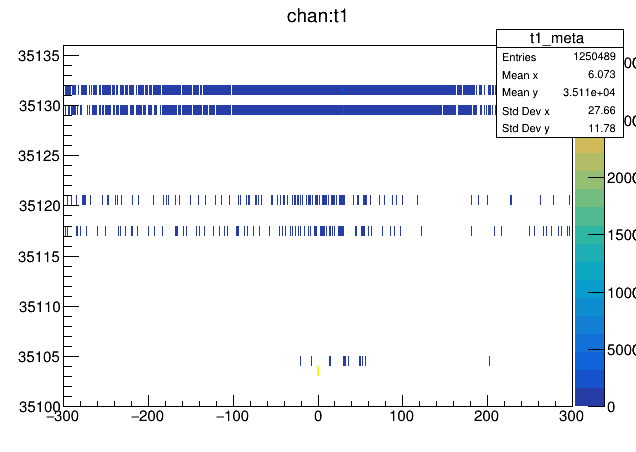

In [4]:
##################################################
##             overview TDC 0x0351              ##
##################################################


tdc=351
disp_channels = 36
tree.Draw("chan:t1>>t1_meta(1000,-300,300,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

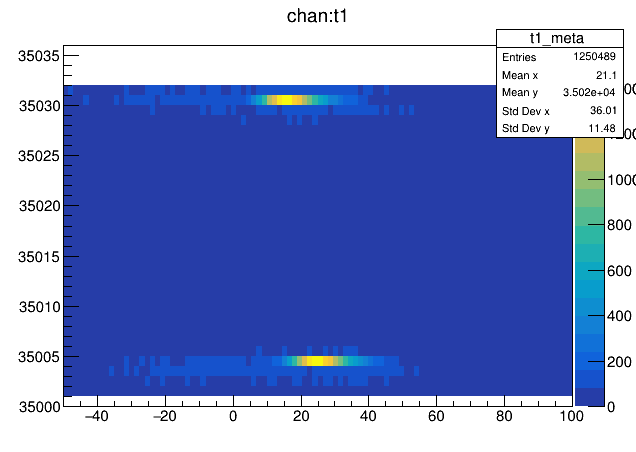

In [5]:
##################################################
##             overview TDC 0x0350              ##
##################################################


tdc=350
disp_channels = 36
tree.Draw("chan:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

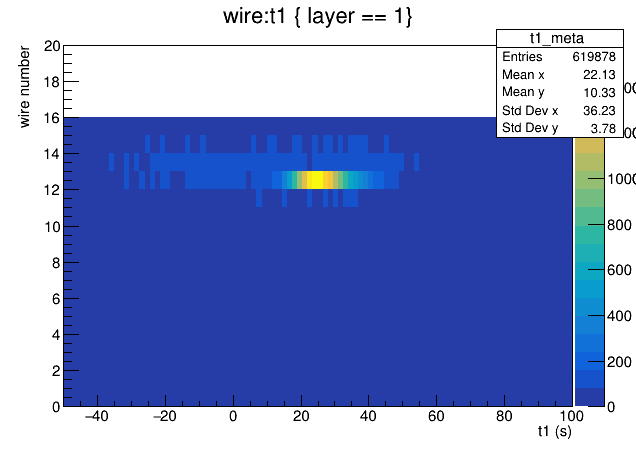

In [6]:
##################################################
##                   layer 1                    ##
##################################################

layer = 1
tree.Draw("wire:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(20,0,20)," layer == {:d}".format(layer),"colz")
t1_meta = f.Get("t1_meta")
#t1_meta.SetTitle("t1 meta")
t1_meta.GetXaxis().SetTitle("t1 (s)")
t1_meta.GetYaxis().SetTitle("wire number")
t1_meta.Draw("colz")
c.Draw()

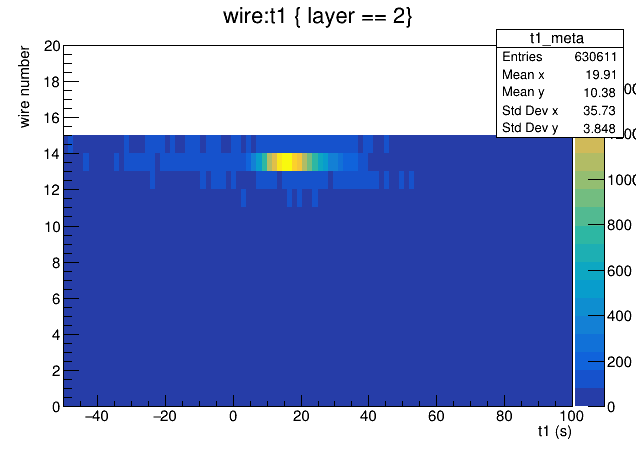

In [7]:
##################################################
##                   layer 2                    ##
##################################################

layer = 2
tree.Draw("wire:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(20,0,20)," layer == {:d}".format(layer),"colz")
t1_meta = f.Get("t1_meta")
#t1_meta.SetTitle("t1 meta")
t1_meta.GetXaxis().SetTitle("t1 (s)")
t1_meta.GetYaxis().SetTitle("wire number")
t1_meta.Draw("colz")
c.Draw()

tree has 62943 entries


Warning in <TFile::Append>: Replacing existing TH1: coinc_matrix (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: coinc_wires (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: meta_fish (Potential memory leak).


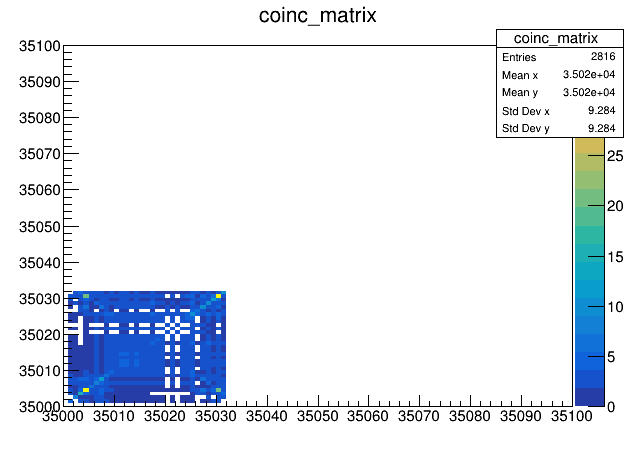

In [27]:
##################################################
##            read root tree example            ##
##################################################


t1_l = -30
t1_r = 100


## variables that will be filled from root tree:
last_evt = 0

entries = tree.GetEntries()
print("tree has {:d} entries".format(entries))

processed_tracks = 0

coinc_matrix = ROOT.TH2F("coinc_matrix","coinc_matrix", 500, 35000, 35000+500, 500, 35000, 35000+500)

w = 50
coinc_wires = ROOT.TH2F("coinc_wires","coinc_wires", w, 0, w, w, 0, w)

meta_fish = ROOT.TH2F("meta_fish","meta_fish", 500, -2500, 2500, 500, -250, 250);

#for i in range(0,entries):
for i in range(0,100):
  
  tree.GetEntry(i)
  this_event = tree.event
  hits = this_event.hits
  
  n_hits = hits.size()
    
  for hit_no_a in range(0,n_hits):
    hit_a = hits[hit_no_a]
    for hit_no_b in range(0,n_hits):
      hit_b = hits[hit_no_b]
    
      if ( (hit_a.t1 > t1_l and hit_a.t1 < t1_r)  and  (hit_b.t1 > t1_l and hit_b.t1 < t1_r) ):
      
        coinc_matrix.Fill(hit_a.chan,hit_b.chan)    
          
        coinc_wires.Fill(hit_a.wire + (hit_a.layer-1)*20 ,hit_b.wire + (hit_b.layer-1)*20)      
      
        #if (   (hit_a.chan > 35000 and hit_a.chan < 35100) and  (hit_b.chan > 35000 and hit_a.chan < 35100)):
        #  meta_fish.Fill(hit_a.t1 + hit_b.t1, hit_a.t1 - hit_b.t1)


coinc_matrix.GetXaxis().SetRangeUser(35000,35100)
coinc_matrix.GetYaxis().SetRangeUser(35000,35100)
coinc_matrix.Draw("colz")

c.Draw()

    

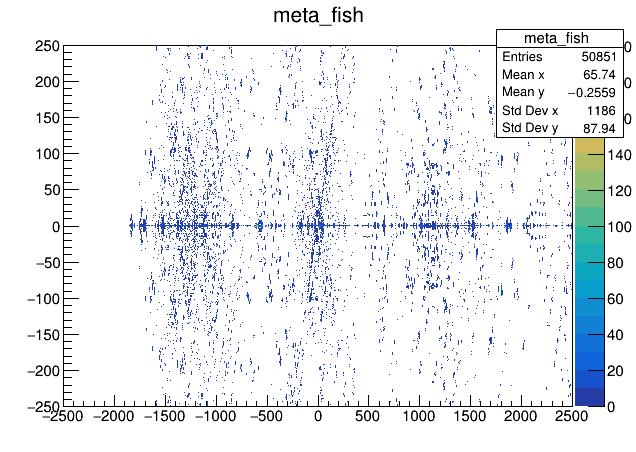

In [9]:

meta_fish.Draw("colz")

c.Draw()

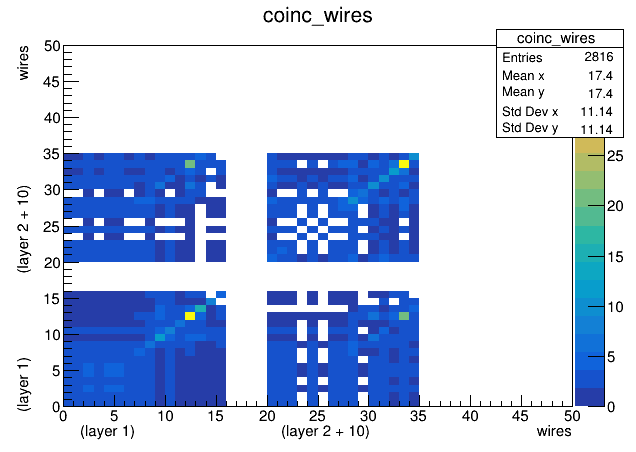

In [36]:

coinc_wires.Draw("colz")
coinc_wires.GetXaxis().SetTitle("(layer 1)" + " "*35 +  "(layer 2 + 10)" + " "*40 + "wires")
coinc_wires.GetYaxis().SetTitle("(layer 1)" + " "*20 +  "(layer 2 + 10)" + " "*25 + "wires")
c.Draw()

In [11]:
#archive(label="coinc_matrix_working")